This page of code is written for two reasons:
1. Deal with the column pdays (the data appears to be mixed)
2. Binning the numerical data to form completely categorial data -->See Other notebook
Note: To ask hans more about index resetting and whether or not methodology for converting to binary is correct

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [71]:
df = pd.read_csv('BankMarket.csv').dropna()
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [72]:
#poutcome and contact are mostly unknown, hence we drop these columns

df = df.drop(columns = ['contact','poutcome'])

In [73]:
#pdays has a special categorisation. By right, it is supposed to be numeric data, but it has a negative value
# pdays represents the time (in days) of last contact by the agent.
#-1 is used for cases where the client has not met the seller before.

#First, we create a dict in order to convert a copy of column previous (0 means never meet, anything else means meet before)

#Binary conversion attempted here

prev_array = np.where(df['previous'] == 0, 0, 1)
#print(df_add)
df_add = pd.DataFrame(data=prev_array, columns=['previous2'])
df_add.head()

,previous2
0,0
1,0
2,0
3,0
4,0


In [74]:
#Reserved for doing categorisation of data

dict = {
    'no': 0,
    'yes': 1
}

dict_edu = {
    'primary': 1,
    'secondary':2,
    'tertiary':3,
}

dict_married = {
    'single': 1,
    'married': 2,
    'divorced': 3,
}

dict_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

dict_job = {
    'admin.': 1,
    'unemployed': 2,
    'management': 3,
    'housemaid': 4,
    'entrepreneur':5,
    "student": 6,
    "blue-collar": 7,
    "self-employed": 8,
    "retired": 9,
    "technician":10,
    "services":11
}
#This kind of classification maps unknown values to NaN, which allows for them to be removed later

df['y'] = df['y'].map(dict)
df['default'] = df['default'].map(dict)
df['housing'] = df['housing'].map(dict)
df['loan'] = df['loan'].map(dict)

df['marital'] = df['marital'].map(dict_married)

df['education'] = df['education'].map(dict_edu)

df['month'] = df['month'].map(dict_month)

df['job'] = df['job'].map(dict_job)

#Add previous2 column to dataset. Note the configuration of the concat
df = pd.concat([df, df_add], sort=False, axis=1)

#drop NaN columns
df = df.dropna()

df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,previous2
0,58,3.0,2,3.0,0,2143,1,0,5,5,261,1,-1,0,0,0
1,44,10.0,1,2.0,0,29,1,0,5,5,151,1,-1,0,0,0
2,33,5.0,2,2.0,0,2,1,1,5,5,76,1,-1,0,0,0
5,35,3.0,2,3.0,0,231,1,0,5,5,139,1,-1,0,0,0
6,28,3.0,1,3.0,0,447,1,1,5,5,217,1,-1,0,0,0


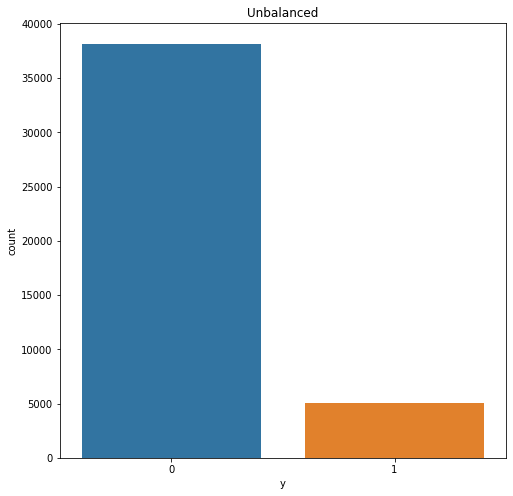

In [75]:
plt.figure(figsize=(8, 8))

sns.countplot('y', data=df)

plt.title('Unbalanced')

plt.show()

In [76]:
#find the number in the minority category
df.y.value_counts()

0    38172
1     5021
Name: y, dtype: int64

In [77]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the yes class in a separate dataset.
yes_df = shuffled_df.loc[shuffled_df['y'] == 1]

#Randomly select ? observations from the no (majority class)
#n = (df.y == 1).count()
#print(n)
no_df = shuffled_df.loc[shuffled_df['y'] == 0].sample(n = 5021,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([yes_df, no_df])

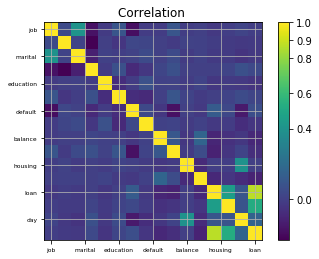

In [78]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(df.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation ')
labels=['age','job','marital','education','default','balance','housing','loan','day','month','duration','campaign','pdays','previous','previous2','y',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show()

In [79]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,previous2
age,1.000000,0.048045,0.403288,-0.167092,-0.016245,0.097602,-0.185152,-0.010029,-0.008451,0.094109,-0.004953,0.004050,-0.023248,0.001099,0.024760,0.000635
job,0.048045,1.000000,0.017340,-0.228625,0.002014,-0.034343,0.031785,0.026668,0.005483,-0.013050,0.011397,0.010491,-0.007834,-0.015997,-0.025936,-0.019522
marital,0.403288,0.017340,1.000000,-0.122251,0.006891,-0.002058,0.013112,0.046938,0.005032,0.049605,-0.013029,0.007872,-0.020094,-0.014967,-0.045749,-0.025408
education,-0.167092,-0.228625,-0.122251,1.000000,-0.012011,0.069432,-0.080456,-0.028293,0.025957,0.073334,0.002482,0.004201,0.003683,0.024938,0.070920,0.040806
default,-0.016245,0.002014,0.006891,-0.012011,1.000000,-0.066458,-0.009031,0.076025,0.008823,0.015964,-0.011040,0.016441,-0.029721,-0.017893,-0.023244,-0.039165
balance,0.097602,-0.034343,-0.002058,0.069432,-0.066458,1.000000,-0.067037,-0.084378,0.004118,0.094138,0.020051,-0.016251,0.003928,0.016564,0.051386,0.030422
housing,-0.185152,0.031785,0.013112,-0.080456,-0.009031,-0.067037,1.000000,0.037004,-0.029826,-0.175594,0.004017,-0.025554,0.124762,0.036803,-0.138300,0.064456
loan,-0.010029,0.026668,0.046938,-0.028293,0.076025,-0.084378,0.037004,1.000000,0.010957,0.020067,-0.013230,0.010447,-0.024369,-0.011367,-0.068802,-0.032100
day,-0.008451,0.005483,0.005032,0.025957,0.008823,0.004118,-0.029826,0.010957,1.000000,0.105959,-0.030074,0.164982,-0.094343,-0.052053,-0.030247,-0.088196
month,0.094109,-0.013050,0.049605,0.073334,0.015964,0.094138,-0.175594,0.020067,0.105959,1.000000,-0.013339,0.055813,-0.111210,-0.037150,0.016888,-0.063399


In [80]:
from sklearn.model_selection import train_test_split

x = normalized_df[['housing', 'loan','previous2']]
y = normalized_df['y']

x.head()

,housing,loan,previous2
41787,0,0,0
40757,0,0,1
36829,1,1,0
44098,0,0,1
22465,0,0,0


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

x_train.head()

,housing,loan,previous2
38116,1,1,1
11846,1,1,0
40076,0,0,1
32802,0,0,0
499,1,0,0


In [82]:
from sklearn.svm import SVC

svClassifier = SVC(kernel = 'linear')
svClassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [83]:
y_test

30946    0
35016    0
42516    1
41660    0
31914    1
24395    0
42285    1
35447    1
43105    1
27202    0
44258    1
6671     0
40119    1
31971    0
35991    0
42140    1
43609    1
44207    1
666      0
38926    1
14153    1
3376     0
43961    1
43879    1
40306    0
44487    1
43552    1
8607     0
42827    0
41550    1
        ..
43363    1
15932    1
44082    1
22038    0
43794    1
30278    0
44975    1
20695    0
14178    0
18359    0
17245    1
24527    1
19653    0
33907    1
33584    0
31043    1
8079     0
33886    1
19157    1
41356    0
12972    0
44474    1
37456    0
31283    1
25207    0
40157    1
2439     0
8011     0
5388     0
6981     0
Name: y, Length: 2511, dtype: int64

In [84]:
y_pred = svClassifier.predict(x_test)
y_pred # predicted result

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score
# show how accurate the model can predict
accuracy_score(y_test, y_pred)

0.6121067303863003

In [86]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[735, 509],
       [465, 802]], dtype=int64)

In [87]:
#repeating test with previous2 only

x = normalized_df[['previous2']]
y = normalized_df['y']

x.head()

,previous2
41787,0
40757,1
36829,0
44098,1
22465,0


In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

x_train.head()

,previous2
38116,1
11846,0
40076,1
32802,0
499,0


In [89]:
svClassifier = SVC(kernel = 'linear')
svClassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [90]:
y_pred = svClassifier.predict(x_test)
y_pred # predicted result

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
# show how accurate the model can predict
accuracy_score(y_test, y_pred)

0.596973317403425

In [92]:
confusion_matrix(y_test, y_pred)

array([[1045,  199],
       [ 813,  454]], dtype=int64)

NameError: name 'x' is not defined